# 2D Gaussian curve fit test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from curvefit_2DGaussian_test import scipy_curve_fit_tester, gpufit_curve_fit_tester, torchimize_curve_fit_tester, modified_torch_curve_fit_tester

## run test functions

In [7]:
rng = np.random.default_rng(123)
array_size_min = 1e3
array_size_max = 1e6
samp_num = 10
repeat_1 = 10
repeat_2 = 6
warmup_run = 2
assert warmup_run < repeat_2


array_size_list = np.logspace(np.log10(array_size_min), np.log10(array_size_max), samp_num)
array_size_list_repeat = np.repeat(array_size_list, repeat_1)
permuted_indices = rng.permutation(len(array_size_list_repeat))

scipy_time_list_all = np.empty((len(array_size_list_repeat)))
gpufit_time_list_all = np.empty((len(array_size_list_repeat)))
torchimize_time_list_all = np.empty((len(array_size_list_repeat)))
modified_torch_time_list_all = np.empty((len(array_size_list_repeat)))

for index in permuted_indices:
    array_size_x = np.sqrt(array_size_list_repeat[index]).astype(int)
    array_size_y = array_size_x

    scipy_test = scipy_curve_fit_tester(array_size_x=array_size_x, array_size_y=array_size_y, repeat=repeat_2)
    gpufit_test = gpufit_curve_fit_tester(array_size_x=array_size_x, array_size_y=array_size_y, repeat=repeat_2)
    torchimize_test = torchimize_curve_fit_tester(array_size_x=array_size_x, array_size_y=array_size_y, repeat=repeat_2)
    modified_torch_test = modified_torch_curve_fit_tester(array_size_x=array_size_x, array_size_y=array_size_y, repeat=repeat_2)

    _, _, _, _, _, scipy_time_list = scipy_test.curve_fit_test(print_time=False)
    time.sleep(0.2)
    _, _, _, _, _, gpufit_time_list = gpufit_test.curve_fit_test(print_time=False)
    time.sleep(0.2)
    _, _, _, _, _, torchimize_time_list = torchimize_test.curve_fit_test(print_time=False)
    time.sleep(0.2)
    _, _, _, _, _, modified_torch_time_list = modified_torch_test.curve_fit_test(print_time=False)
    time.sleep(0.2)

    scipy_time_list_all[index] = np.mean(scipy_time_list[warmup_run:])
    gpufit_time_list_all[index] = np.mean(gpufit_time_list[warmup_run:])
    torchimize_time_list_all[index] = np.mean(torchimize_time_list[warmup_run:])
    modified_torch_time_list_all[index] = np.mean(modified_torch_time_list[warmup_run:])

scipy_time_list_all = scipy_time_list_all.reshape((len(array_size_list), repeat_1))
gpufit_time_list_all = gpufit_time_list_all.reshape((len(array_size_list), repeat_1))
torchimize_time_list_all = torchimize_time_list_all.reshape((len(array_size_list), repeat_1))
modified_torch_time_list_all = modified_torch_time_list_all.reshape((len(array_size_list), repeat_1))

## calculate statistics

In [8]:
confidence_level = 1.96 # in sigma, 95% confidence level corresponds to 1.96 sigma

scipy_time_list_mean = np.mean(scipy_time_list_all[:, warmup_run:], axis=1)
scipy_time_list_std = np.std(scipy_time_list_all[:, warmup_run:], axis=1)
scipy_time_list_conf = scipy_time_list_std * confidence_level / np.sqrt(repeat_1)

gpufit_time_list_mean = np.mean(gpufit_time_list_all[:, warmup_run:], axis=1)
gpufit_time_list_std = np.std(gpufit_time_list_all[:, warmup_run:], axis=1)
gpufit_time_list_conf = gpufit_time_list_std * confidence_level / np.sqrt(repeat_1)

torchimize_time_list_mean = np.mean(torchimize_time_list_all[:, warmup_run:], axis=1)
torchimize_time_list_std = np.std(torchimize_time_list_all[:, warmup_run:], axis=1)
torchimize_time_list_conf = torchimize_time_list_std * confidence_level / np.sqrt(repeat_1)

modified_torch_time_list_mean = np.mean(modified_torch_time_list_all[:, warmup_run:], axis=1)
modified_torch_time_list_std = np.std(modified_torch_time_list_all[:, warmup_run:], axis=1)
modified_torch_time_list_conf = modified_torch_time_list_std * confidence_level / np.sqrt(repeat_1)

## plot

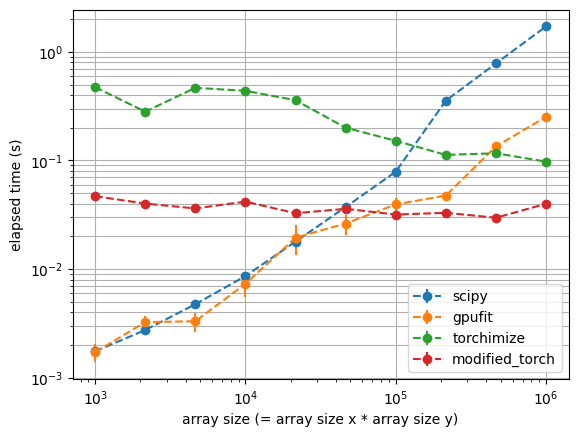

In [9]:
plt.errorbar(array_size_list, scipy_time_list_mean, yerr=scipy_time_list_conf, fmt='o--', label='scipy')
plt.errorbar(array_size_list, gpufit_time_list_mean, yerr=gpufit_time_list_conf, fmt='o--', label='gpufit')
plt.errorbar(array_size_list, torchimize_time_list_mean, yerr=torchimize_time_list_conf, fmt='o--', label='torchimize')
plt.errorbar(array_size_list, modified_torch_time_list_mean, yerr=modified_torch_time_list_conf, fmt='o--', label='modified_torch')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('elapsed time (s)')
plt.xlabel('array size (= array size x * array size y)')
# plt.grid(which='both', axis='y')
plt.gca().xaxis.grid(True, which='major')
plt.gca().yaxis.grid(True, which='both')
plt.legend(loc='lower right')
plt.show()